In [34]:
!pip install openpyxl scikit-learn lightgbm xgboost


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.4 MB 1.1 MB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.4 MB 1.1 MB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.4 MB 774.0 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.4 MB 748.1 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.4 MB 778.2 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 896.4 kB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.4 MB 952.6 kB/s eta 0:00:02
   ---------- ----------------------------- 0.4/1.4 MB 933.2 kB/s eta 0:00:02
   ------------ --------------------------- 0.4/1.4 MB 981.9 kB/s eta 0:00:02
   -------------- ------------------------- 0.5/1.4 MB 1.1 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.4 MB 1.1 MB/s eta 0:00:01
   ---------


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ----------------------- --------------- 76.0/124.9 MB 505.9 kB/s eta 0:01:37
   ----------------------- --------------- 76.0/124.9 MB 505.2 kB/s eta 0:01:37
   ----------------------- --------------- 76.0/124.9 MB 504.8 kB/s eta 0:01:37
   ----------------------- --------------- 76.1/124.9 MB 504.4 kB/s eta 0:01:37
   ----------------------- --------------- 76.1/124.9 MB 509.9 kB/s eta 0:01:36
   ----------------------- --------------- 76.1/124.9 MB 508.3 kB/s eta 0:01:36
   ----------------------- --------------- 76.2/124.9 MB 507.1 kB/s eta 0:01:37
   ----------------------- --------------- 76.2/124.9 MB 507.9 kB/s eta 0:01:36
   ----------------------- --------------- 76.2/124.9 MB 508.3 kB/s eta 0:01:36
   ----------------------- --------------- 76.2/124.9 MB 508.3 kB/s eta 0:01:36
   ----------------------- --------------- 76.2/124.9 MB 505.9 kB/s eta 0:01:37
   ----------------------- --------------- 76.2/124.9 MB 505.9 kB/s eta 0:01:37
   ----------------------- -------------

In [11]:
import pandas as pd

# Load the Excel file
file_path = 'P3- Churn-Modelling Data.xlsx'
df = pd.read_excel(file_path)

df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:

# Get basic information about the DataFrame
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  churned          10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
# Check for missing values
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churned            0
dtype: int64


Customer Demographics
1. Distribution of Customers Across Different Age Groups

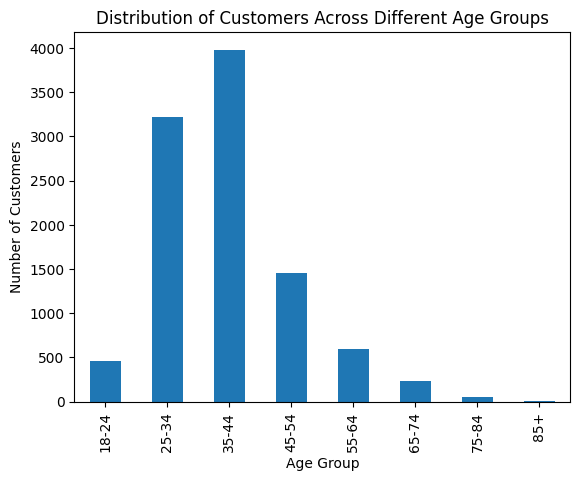

In [14]:
import matplotlib.pyplot as plt

# Define age bins and labels
bins = [18, 25, 35, 45, 55, 65, 75, 85, 95]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+']

# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Plot the distribution
age_group_dist = df['AgeGroup'].value_counts().sort_index()
age_group_dist.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers Across Different Age Groups')
plt.show()


2. Gender Distribution of Customers

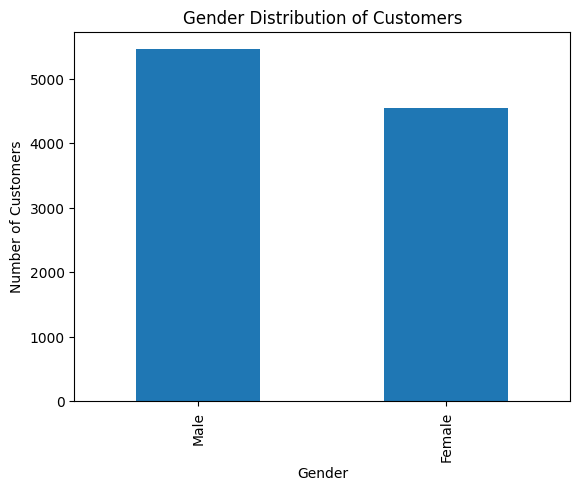

In [15]:
# Plot the gender distribution
gender_dist = df['Gender'].value_counts()
gender_dist.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Gender Distribution of Customers')
plt.show()

Churn Analysis
1. Percentage of Customers Who Have Churned

In [17]:
# Calculate churn percentage
churn_percentage = df['churned'].mean() * 100
print(f'Percentage of customers who have churned: {churn_percentage:.2f}%')


Percentage of customers who have churned: 20.37%


2. Main Reasons for Customer Churn

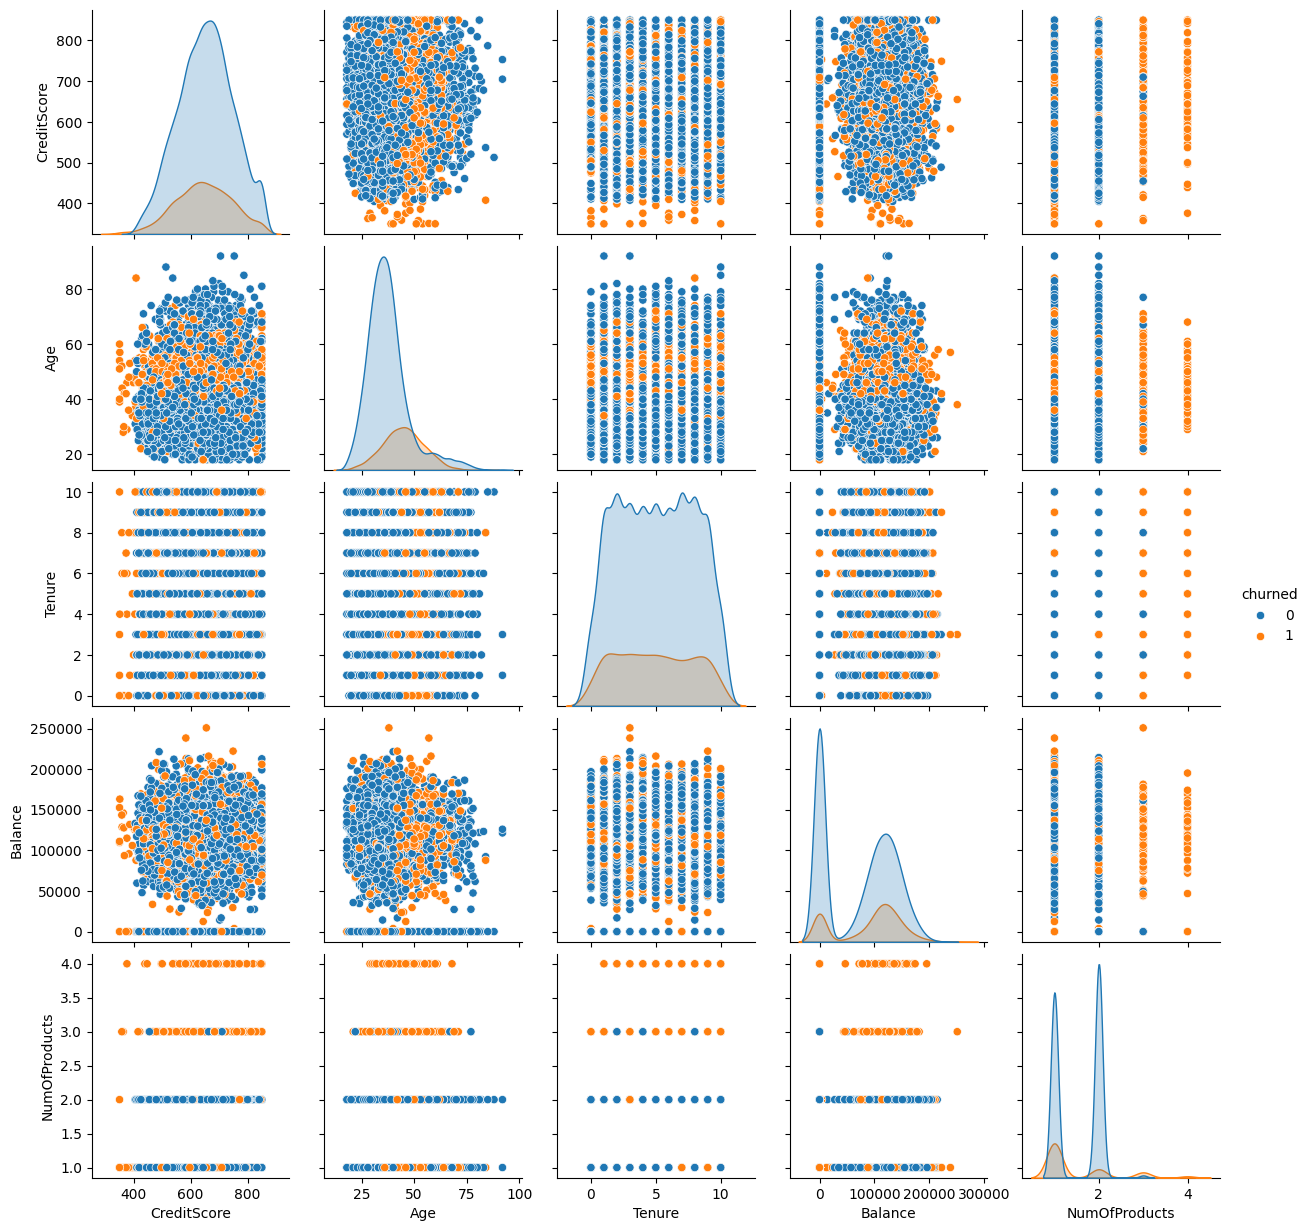

In [19]:
import seaborn as sns

# Pairplot to visualize patterns in the data (using example features)
sns.pairplot(df, hue='churned', vars=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts'])
plt.show()


3. Patterns or Trends Among Customers Who Have Churned

In [21]:
# Compare churned vs. non-churned customers in terms of key features
churned = df[df['churned'] == 1]
non_churned = df[df['churned'] == 0]

# Example: Compare average age
avg_age_churned = churned['Age'].mean()
avg_age_non_churned = non_churned['Age'].mean()
print(f'Average age of churned customers: {avg_age_churned:.2f}')
print(f'Average age of non-churned customers: {avg_age_non_churned:.2f}')


Average age of churned customers: 44.84
Average age of non-churned customers: 37.41


 Product Usage
1. Most Commonly Used Products or Services

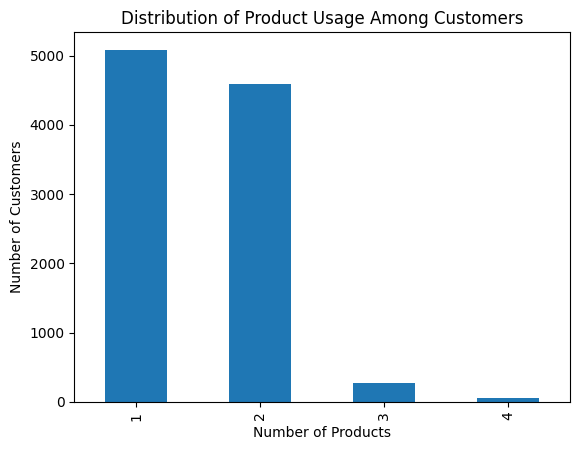

In [22]:
# Assuming 'NumOfProducts' indicates the number of products used
product_usage_dist = df['NumOfProducts'].value_counts()
product_usage_dist.plot(kind='bar')
plt.xlabel('Number of Products')
plt.ylabel('Number of Customers')
plt.title('Distribution of Product Usage Among Customers')
plt.show()


2. Usage Patterns of Different Customer Segments

C:\Users\hp\AppData\Local\Temp\ipykernel_5488\2242280333.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_usage_by_age = df.groupby('AgeGroup')['NumOfProducts'].mean()


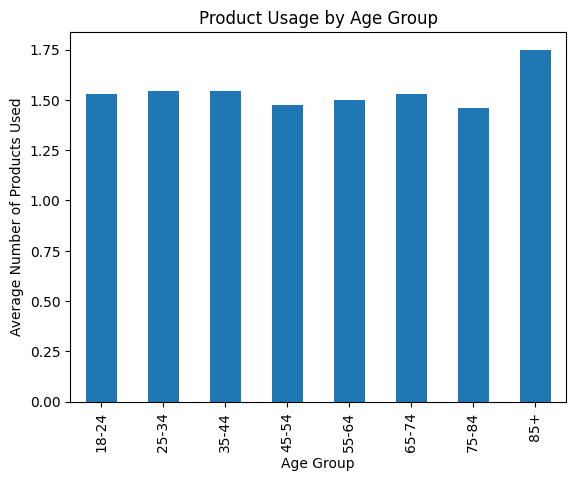

In [23]:
# Example: Product usage by age group
product_usage_by_age = df.groupby('AgeGroup')['NumOfProducts'].mean()
product_usage_by_age.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Average Number of Products Used')
plt.title('Product Usage by Age Group')
plt.show()


Financial Analysis
1. Average Account Balance of Customers

In [24]:
# Calculate average account balance
avg_balance = df['Balance'].mean()
print(f'Average account balance of customers: {avg_balance:.2f}')


Average account balance of customers: 76485.89


2. Financial Characteristics of Churned vs. Non-Churned Customers

In [25]:
# Compare average balance
avg_balance_churned = churned['Balance'].mean()
avg_balance_non_churned = non_churned['Balance'].mean()
print(f'Average balance of churned customers: {avg_balance_churned:.2f}')
print(f'Average balance of non-churned customers: {avg_balance_non_churned:.2f}')

Average balance of churned customers: 91108.54
Average balance of non-churned customers: 72745.30


Predictive Modeling
1. Significant Predictors of Customer Churn

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Select features and target variable
X = df.drop(columns=['churned', 'CustomerId', 'Surname'])
y = df['churned']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances.head(10))


Age                  0.142276
NumOfProducts        0.120816
EstimatedSalary      0.119282
Balance              0.118034
CreditScore          0.116724
RowNumber            0.114813
Tenure               0.071759
IsActiveMember       0.044962
AgeGroup_45-54       0.033427
Geography_Germany    0.025782
dtype: float64


2. Develop a Predictive Model to Identify At-Risk Customers

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



Predictive Modeling with LightGBM

In [36]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Select features and target variable
X = df.drop(columns=['churned', 'CustomerId', 'Surname'])
y = df['churned']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the model
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f'LightGBM Accuracy: {accuracy_lgb:.2f}')
print(classification_report(y_test, y_pred_lgb))


[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000481 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1124
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267
LightGBM Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1607
           1       0.71      0.49      0.58       393

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



Predictive Modeling with XGBoost

In [37]:
import xgboost as xgb

# Train an XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.2f}')
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.68      0.52      0.59       393

    accuracy                           0.86      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000

